## Optimization Pattern Analysis (Agents vs Human)

Loading data from csv files...
Combined dataset: 409 performance PRs
  AI Agents: 326
  Humans: 83

GENERATING VISUALIZATIONS

OPTIMIZATION PATTERN ANALYSIS SUMMARY

Total PRs Analyzed: 409
  AI Agents: 326
  Humans: 83

Unique Patterns: 8
Unique Sub-Patterns: 22

--------------------------------------------------------------------------------
TOP 5 PATTERNS (OVERALL)
--------------------------------------------------------------------------------
  Memory and Data Locality Optimizations                        138 ( 33.7%)
  Algorithm-Level Optimizations                                  94 ( 23.0%)
  Code Smells and Structural Simplification                      85 ( 20.8%)
  No Meaningful Change                                           56 ( 13.7%)
  I/O and Synchronization                                        23 (  5.6%)

--------------------------------------------------------------------------------
TOP 5 PATTERNS (AI AGENTS)
------------------------------------------------------

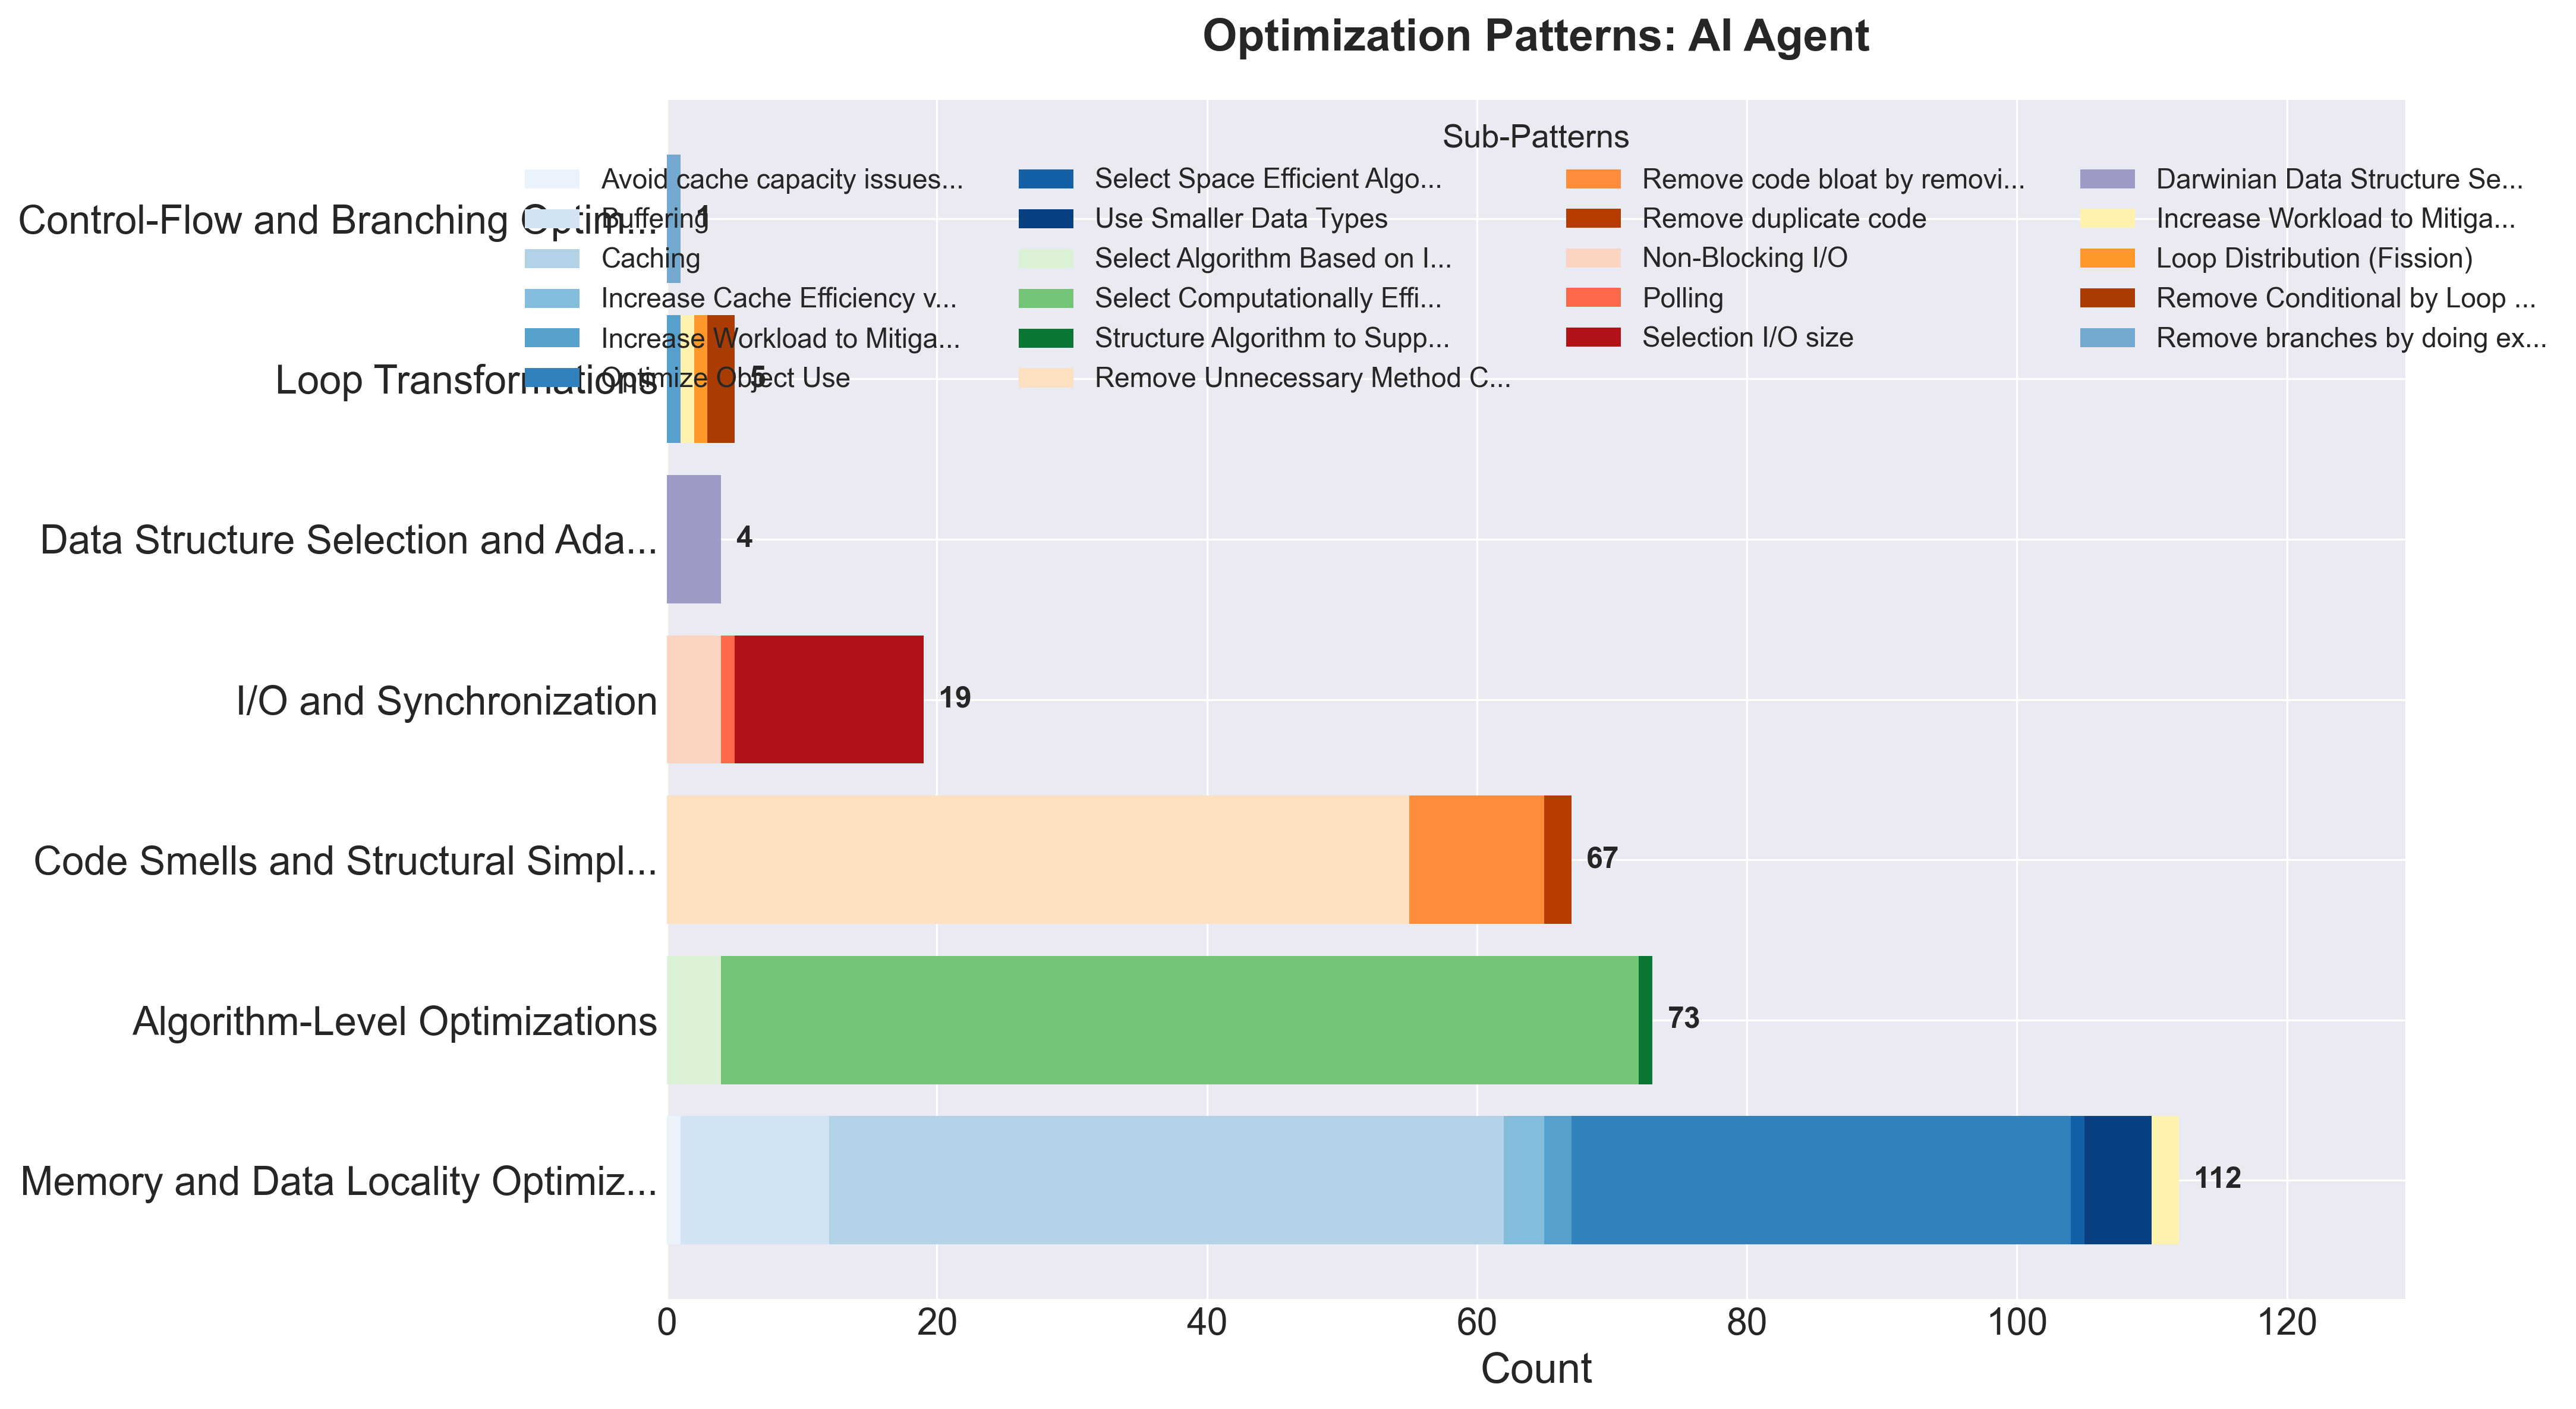

✓ Saved: ./results/optimization_pattern_ai_agent.png

2. Creating pattern-subpattern distribution for Humans...


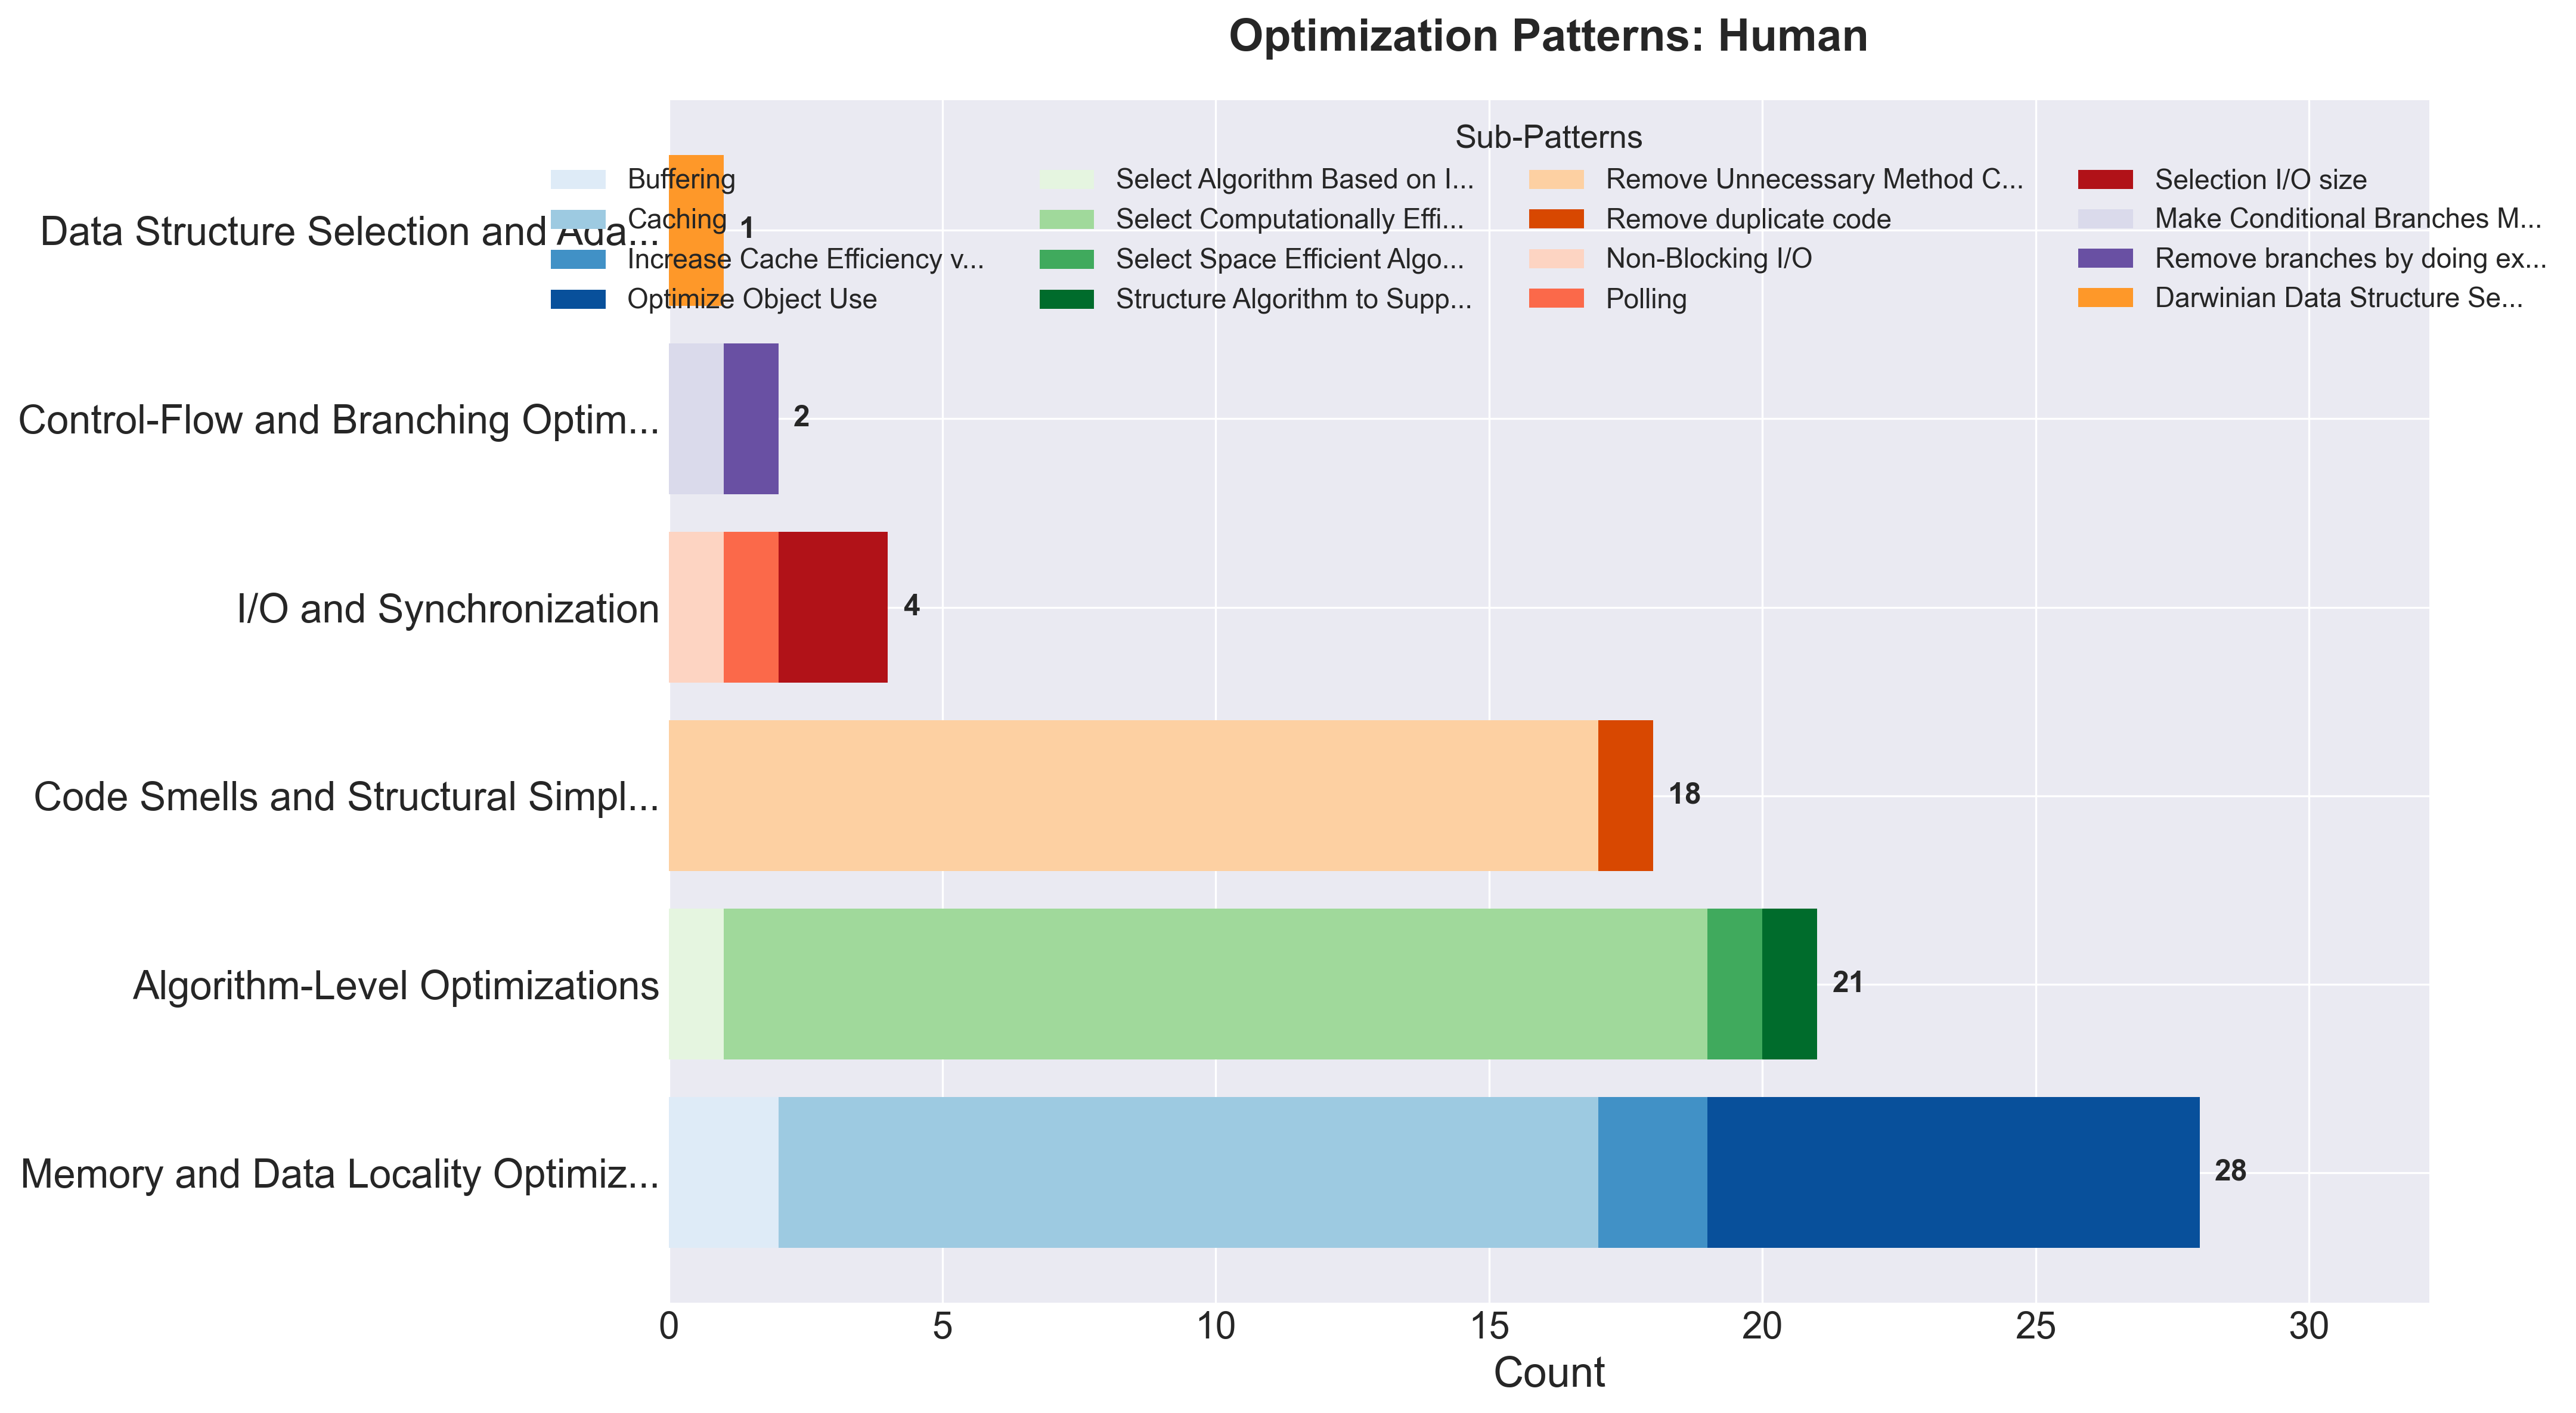

✓ Saved: ./results/optimization_pattern_human.png

3. Creating pattern distribution heatmap...


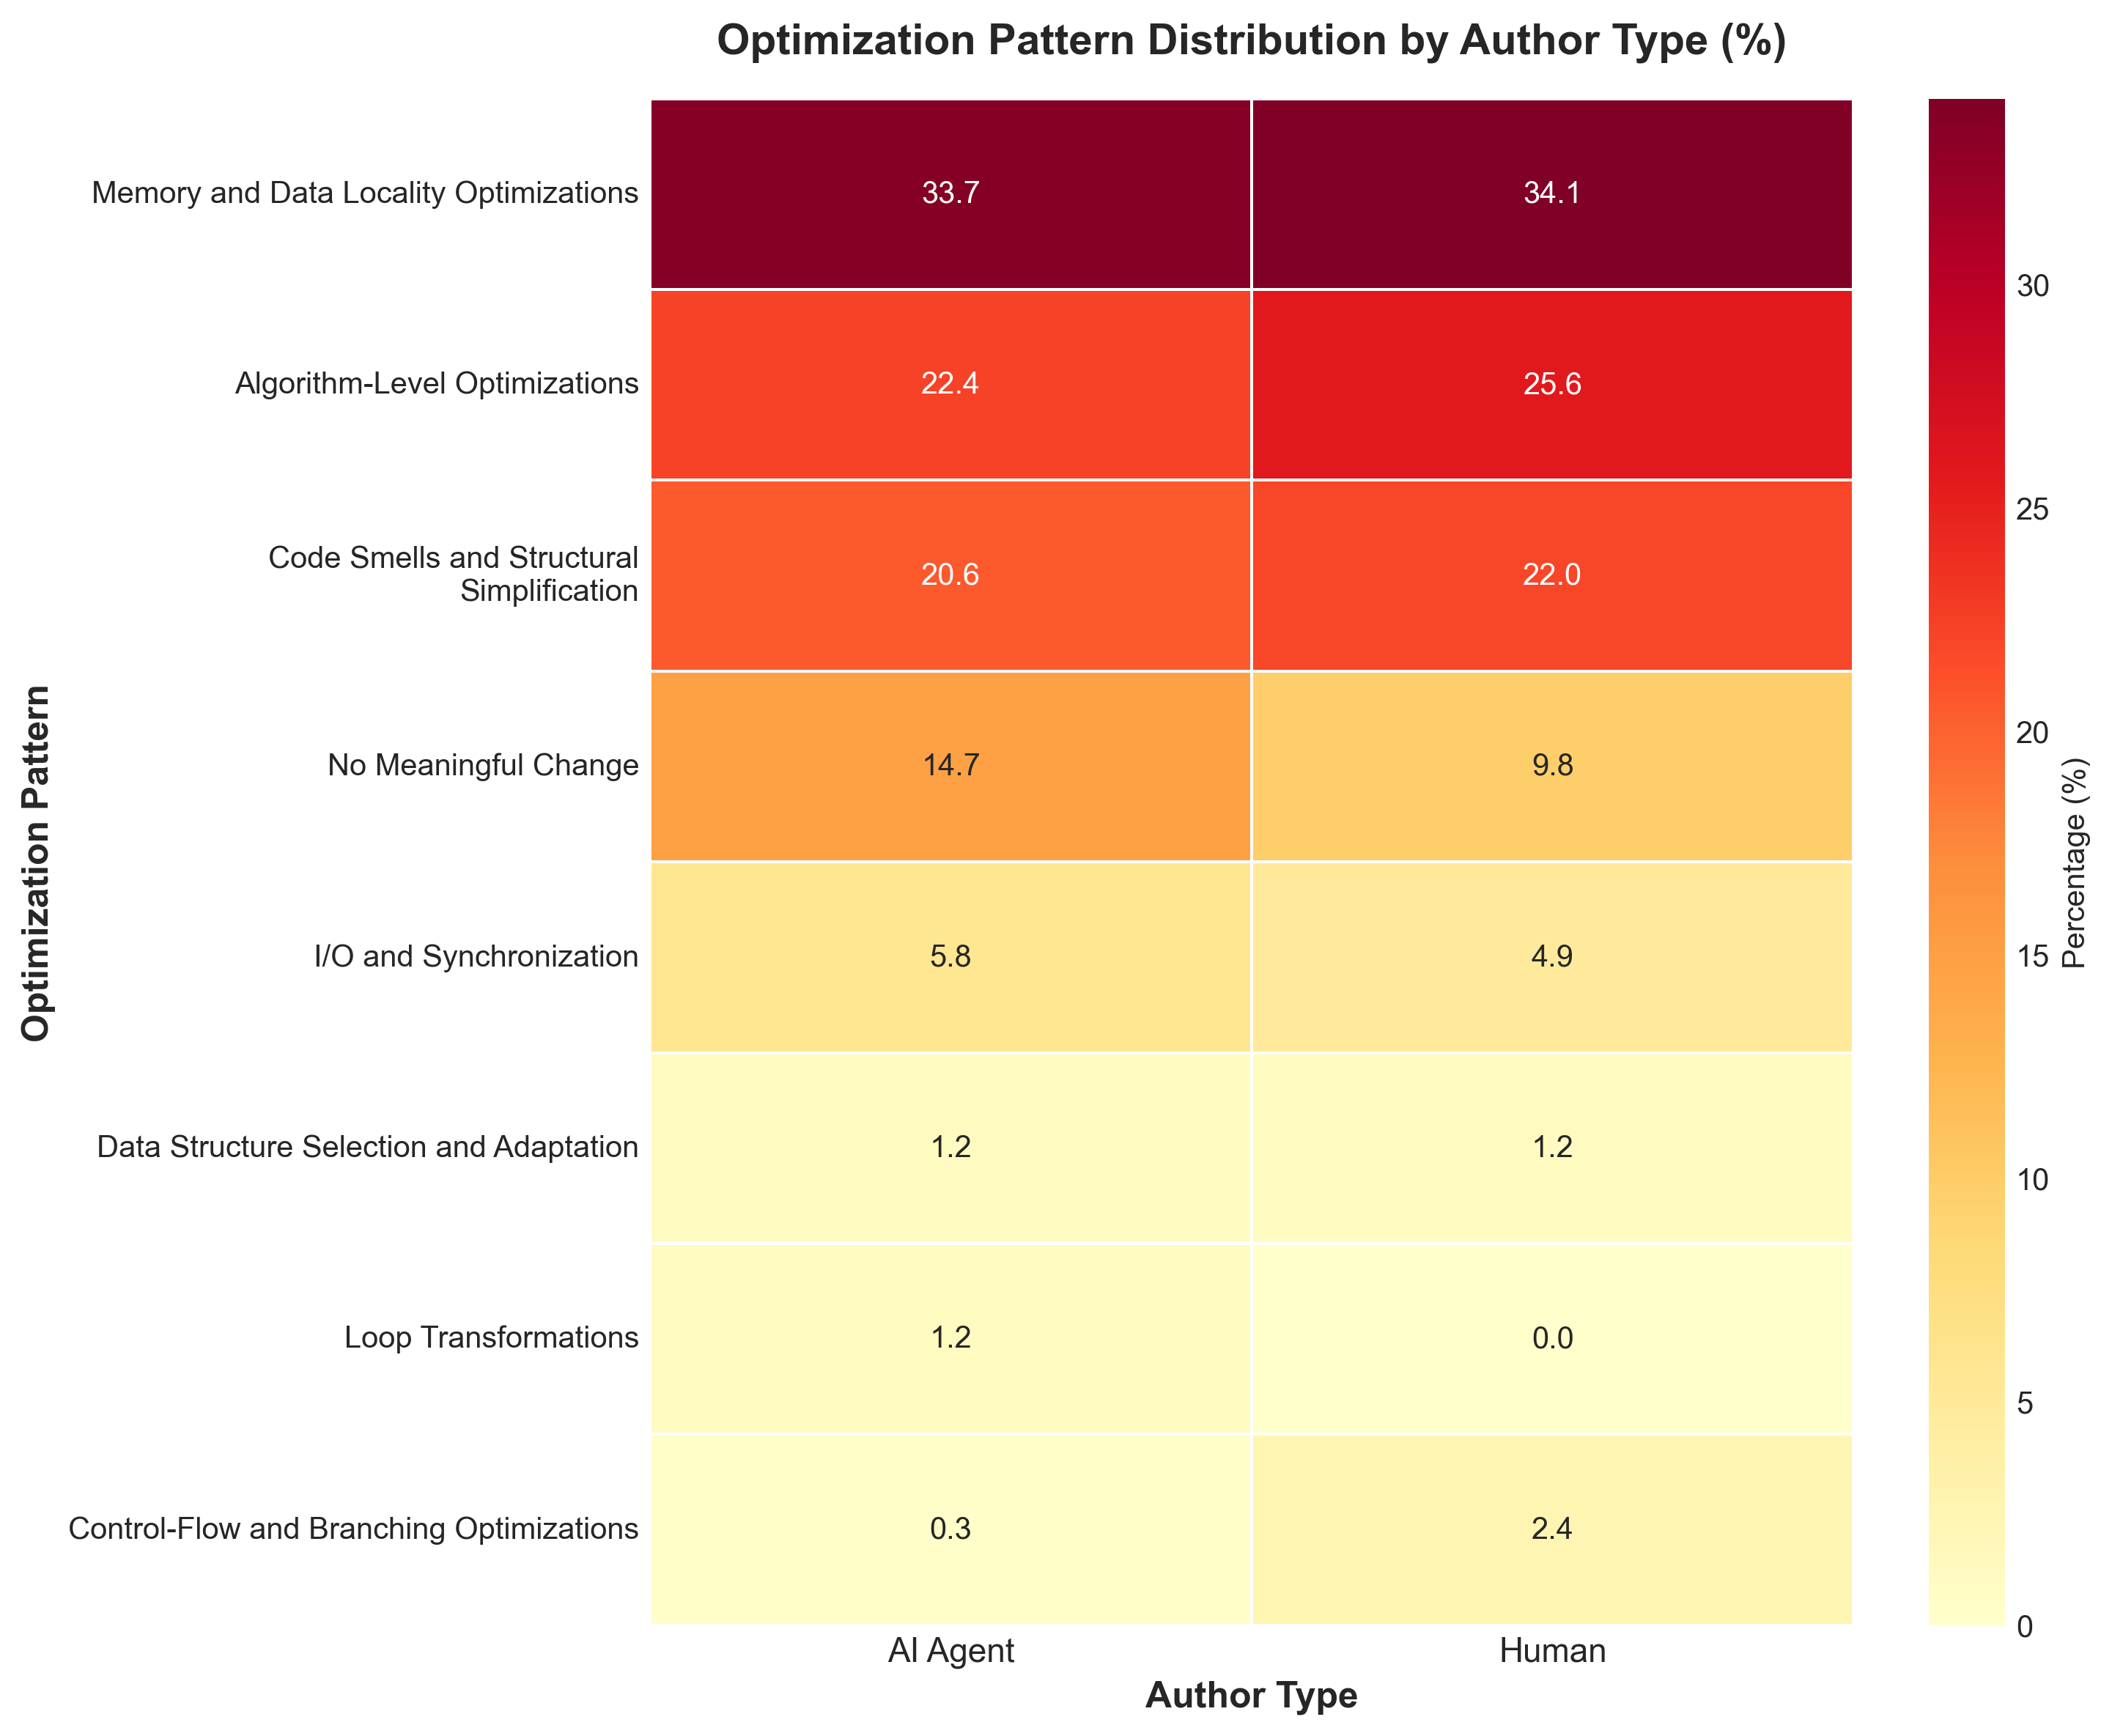

✓ Saved: pattern_heatmap_by_author.png

4. Creating statistical comparison table...


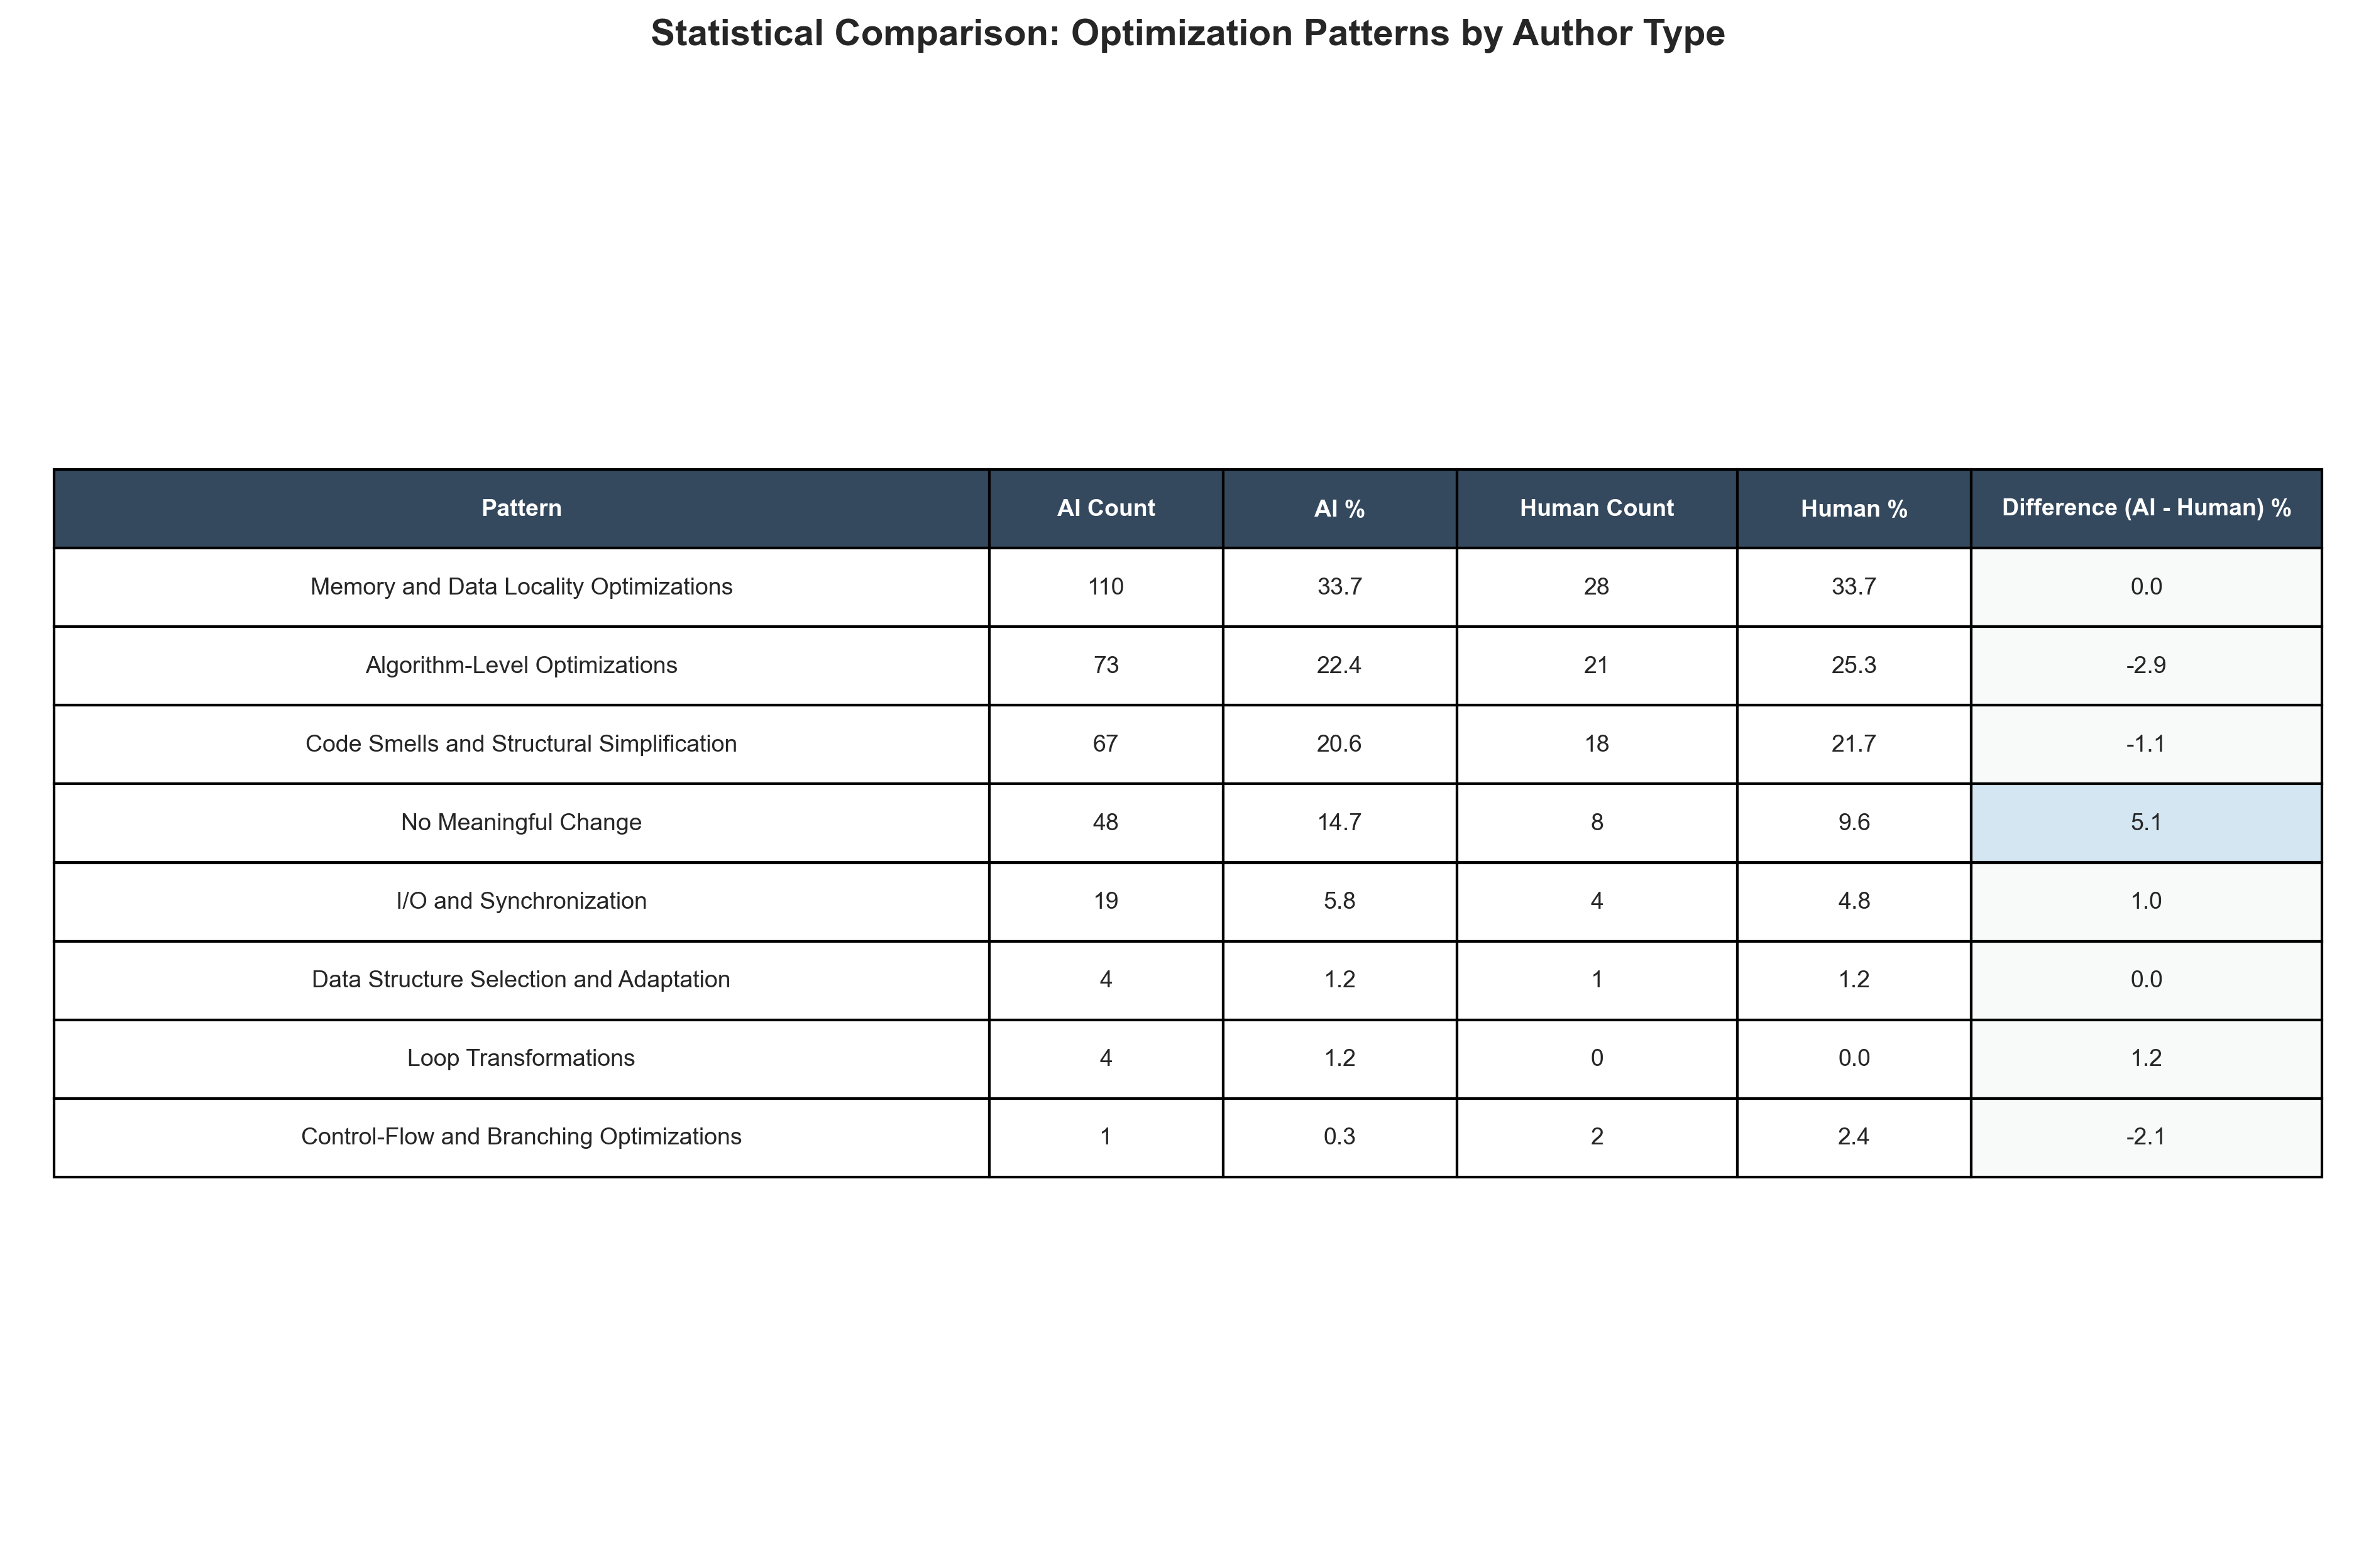

✓ Saved: statistical_comparison_table.png

✓ ALL VISUALIZATIONS COMPLETE!

Generated files:
  1. optimization_pattern_ai_agent.png - Stacked pattern/sub-pattern for AI
  2. optimization_pattern_human.png - Stacked pattern/sub-pattern for Human
  3. pattern_heatmap_by_author.png - Pattern distribution heatmap
  4. statistical_comparison_table.png - Detailed comparison table
  5. pattern_comparison_statistics.csv - Data in CSV format

PATTERN DISTRIBUTION HEATMAP
author_type                                AI Agent  Human
optimization_pattern                                      
Memory and Data Locality Optimizations         33.7   34.1
Algorithm-Level Optimizations                  22.4   25.6
Code Smells and Structural Simplification      20.6   22.0
No Meaningful Change                           14.7    9.8
I/O and Synchronization                         5.8    4.9
Data Structure Selection and Adaptation         1.2    1.2
Loop Transformations                            1.2    0.0
Con

In [2]:
# ============================================================================
# Visualization Script: Optimization Pattern Analysis (Revised)
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import os

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10

# Load data if exits
print("Loading data from csv files...")
if not (os.path.exists('./llm_data/final_data/ai_perf_prs_with_gpt_analysis_full_catalog.csv') and os.path.exists('./llm_data/final_data/human_perf_prs_with_gpt_analysis_full_catalog.csv')):
    raise FileNotFoundError("Required CSV files not found. Please run the analysis notebook first.")
ai_perf_prs_analyzed = pd.read_csv('./llm_data/final_data/ai_perf_prs_with_gpt_analysis_full_catalog.csv')
human_perf_prs_analyzed = pd.read_csv('./llm_data/final_data/human_perf_prs_with_gpt_analysis_full_catalog.csv')

# Combine datasets
analyzed = pd.concat([ai_perf_prs_analyzed, human_perf_prs_analyzed], ignore_index=True)
print(f"Combined dataset: {len(analyzed):,} performance PRs")
print(f"  AI Agents: {(analyzed['author_type'] == 'AI Agent').sum():,}")
print(f"  Humans: {(analyzed['author_type'] == 'Human').sum():,}")

# ============================================================================
# Helper Functions
# ============================================================================

def wrap_labels(labels, width=30):
    """Wrap long labels for better readability"""
    return [textwrap.fill(label, width) for label in labels]


# ============================================================================
# Pattern and Sub-Pattern Distribution (Single Figure per Author Type)
# Using the same style as the provided script
# ============================================================================

def plot_pattern_subpattern_stacked(analyzed, author_type):
    """
    Create stacked horizontal bar chart showing patterns and sub-patterns
    Similar style to the provided script
    """
    
    # Filter by author type
    subset = analyzed[analyzed['author_type'] == author_type].copy()
    
    # Get pattern and sub-pattern data
    pattern_subpattern = subset.groupby(['optimization_pattern', 'optimization_subpattern']).size()
    
    # Build data dictionary
    data = {}
    for (pattern, subpattern), count in pattern_subpattern.items():
        if pd.notna(pattern) and pd.notna(subpattern):
            if pattern not in data:
                data[pattern] = {}
            data[pattern][subpattern] = count
    
    if not data:
        print(f"No data available for {author_type}")
        return
    
    # Sort patterns by total count
    pattern_totals = {k: sum(v.values()) for k, v in data.items()}
    sorted_patterns = sorted(pattern_totals.keys(), key=lambda x: pattern_totals[x], reverse=True)
    data = {k: data[k] for k in sorted_patterns if k in data}
    
    # Short labels for patterns (y-axis)
    short_labels = {}
    for pattern in data.keys():
        # Truncate long pattern names
        if len(pattern) > 35:
            short_labels[pattern] = pattern[:32] + '...'
        else:
            short_labels[pattern] = pattern
    
    # Short labels for sub-patterns (legend)
    sub_short = {}
    for pattern, subs in data.items():
        for sub in subs.keys():
            if len(sub) > 30:
                sub_short[sub] = sub[:27] + '...'
            else:
                sub_short[sub] = sub
    
    # Color maps for each category (cycling through different colormaps)
    available_colormaps = ['Blues', 'Greens', 'Oranges', 'Reds', 'Purples', 'YlOrBr', 'PuBu', 'RdPu']
    colormaps = {}
    for idx, pattern in enumerate(data.keys()):
        num_subs = len(data[pattern])
        colormaps[pattern] = (available_colormaps[idx % len(available_colormaps)], num_subs)
    
    # Flatten subpatterns
    subpatterns = []
    for cat, sub in data.items():
        for sp in sub.keys():
            subpatterns.append((cat, sp))
    
    # Build DataFrame
    rows = []
    for cat in data.keys():
        row = [data[cat].get(sp, 0) for _, sp in subpatterns]
        rows.append(row)
    
    df = pd.DataFrame(rows,
                      index=list(data.keys()),
                      columns=[sp for _, sp in subpatterns])
    
    # Generate colors by category
    colors = []
    for cat, sp in subpatterns:
        cmap_name, count = colormaps[cat]
        cmap = plt.get_cmap(cmap_name)
        idx = list(data[cat].keys()).index(sp)
        colors.append(cmap((idx + 0.5) / max(count, 1)))
    
    # Plot
    fig, ax = plt.subplots(figsize=(14, max(8, len(data) * 0.6)))
    left = np.zeros(len(df))
    y_labels = [short_labels[cat] for cat in df.index]
    
    for i, (_, sp) in enumerate(subpatterns):
        ax.barh(y_labels, df.iloc[:, i], left=left,
                label=sub_short[sp], color=colors[i])
        left += df.iloc[:, i].values
    
    # Add total counts
    totals = df.sum(axis=1).values
    for i, total in enumerate(totals):
        ax.text(total + max(totals)*0.01, i, str(int(total)), 
                va='center', fontsize=12, fontweight='bold')
    
    # Final styling
    ax.set_xlabel('Count', fontsize=17)
    ax.set_title(f'Optimization Patterns: {author_type}', fontsize=18, fontweight='bold', pad=20)
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=15)
    ax.set_xlim(0, max(totals) * 1.15)
    
    # Legend at top center
    ncol = min(4, (len(subpatterns) + 2) // 3)
    legend = ax.legend(title='Sub-Patterns',
                       loc='upper center',
                       bbox_to_anchor=(0.5, 1.0),
                       ncol=ncol,
                       framealpha=0.9,
                       fontsize=11,
                       title_fontsize=13)
    legend.get_frame().set_edgecolor('gray')
    legend.get_frame().set_linewidth(0.5)
    
    plt.tight_layout()
    
    # Save
    filename = f'./results/optimization_pattern_{author_type.lower().replace(" ", "_")}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: {filename}")


# ============================================================================
# Pattern Distribution Heatmap by Author Type
# ============================================================================

def plot_pattern_heatmap(analyzed):
    """Create heatmap showing pattern frequency by author type (percentages)"""
    
    # Create pivot table with percentages
    pattern_pivot = pd.crosstab(
        analyzed['optimization_pattern'],
        analyzed['author_type'],
        normalize='columns'
    ) * 100
    
    # Sort by total frequency
    pattern_totals = analyzed['optimization_pattern'].value_counts()
    pattern_pivot = pattern_pivot.loc[pattern_totals.index]
    
    # Wrap labels
    wrapped_labels = wrap_labels(pattern_pivot.index, width=40)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, max(8, len(pattern_pivot) * 0.4)))
    
    # Create heatmap
    sns.heatmap(
        pattern_pivot,
        annot=True,
        fmt='.1f',
        cmap='YlOrRd',
        cbar_kws={'label': 'Percentage (%)'},
        ax=ax,
        linewidths=0.5,
        linecolor='white'
    )
    
    ax.set_title('Optimization Pattern Distribution by Author Type (%)', 
                 fontweight='bold', fontsize=14, pad=15)
    ax.set_xlabel('Author Type', fontsize=12, fontweight='bold')
    ax.set_ylabel('Optimization Pattern', fontsize=12, fontweight='bold')
    ax.set_yticklabels(wrapped_labels, rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=11)
    
    plt.tight_layout()
    plt.savefig('./results/pattern_heatmap_by_author.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Saved: pattern_heatmap_by_author.png")
    
    return pattern_pivot


# ============================================================================
# Statistical Comparison Table
# ============================================================================

def create_statistical_comparison_table(analyzed):
    """Create detailed statistical comparison table"""
    
    # Get all unique patterns
    all_patterns = analyzed['optimization_pattern'].value_counts().index
    
    comparison_data = []
    
    for pattern in all_patterns:
        ai_count = len(analyzed[(analyzed['author_type'] == 'AI Agent') & 
                                (analyzed['optimization_pattern'] == pattern)])
        human_count = len(analyzed[(analyzed['author_type'] == 'Human') & 
                                   (analyzed['optimization_pattern'] == pattern)])
        
        total_ai = len(analyzed[analyzed['author_type'] == 'AI Agent'])
        total_human = len(analyzed[analyzed['author_type'] == 'Human'])
        
        ai_pct = (ai_count / total_ai * 100) if total_ai > 0 else 0
        human_pct = (human_count / total_human * 100) if total_human > 0 else 0
        
        comparison_data.append({
            'Pattern': pattern,
            'AI Count': ai_count,
            'AI %': ai_pct,
            'Human Count': human_count,
            'Human %': human_pct,
            'Difference (AI - Human) %': ai_pct - human_pct
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('AI Count', ascending=False)
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(16, max(10, len(comparison_df) * 0.5)))
    ax.axis('tight')
    ax.axis('off')
    
    # Wrap pattern names for table
    comparison_df_display = comparison_df.copy()
    comparison_df_display['Pattern'] = [textwrap.fill(p, width=50) for p in comparison_df_display['Pattern']]
    
    # Create table
    table_data = comparison_df_display.round(1).values
    table = ax.table(cellText=table_data,
                    colLabels=comparison_df_display.columns,
                    cellLoc='center',
                    loc='center',
                    colWidths=[0.4, 0.1, 0.1, 0.12, 0.1, 0.15])
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2.5)
    
    # Color code the difference column
    for i in range(len(comparison_df)):
        cell = table[(i+1, 5)]  # Difference column (0-indexed in data, +1 for header)
        diff_val = comparison_df.iloc[i]['Difference (AI - Human) %']
        if diff_val > 5:
            cell.set_facecolor('#d4e6f1')  # Light blue for AI advantage
        elif diff_val < -5:
            cell.set_facecolor('#fadbd8')  # Light red for Human advantage
        else:
            cell.set_facecolor('#f8f9f9')  # Gray for similar
    
    # Header styling
    for j in range(len(comparison_df_display.columns)):
        cell = table[(0, j)]
        cell.set_facecolor('#34495e')
        cell.set_text_props(weight='bold', color='white')
    
    plt.title('Statistical Comparison: Optimization Patterns by Author Type', 
             fontsize=14, fontweight='bold', pad=20)
    
    plt.savefig('./results/statistical_comparison_table.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Saved: statistical_comparison_table.png")
    return comparison_df


# ============================================================================
# Summary Statistics
# ============================================================================

def print_summary_statistics(analyzed):
    """Print summary statistics"""
    
    print("\n" + "="*80)
    print("OPTIMIZATION PATTERN ANALYSIS SUMMARY")
    print("="*80)
    
    print(f"\nTotal PRs Analyzed: {len(analyzed):,}")
    print(f"  AI Agents: {(analyzed['author_type'] == 'AI Agent').sum():,}")
    print(f"  Humans: {(analyzed['author_type'] == 'Human').sum():,}")
    
    print(f"\nUnique Patterns: {analyzed['optimization_pattern'].nunique()}")
    print(f"Unique Sub-Patterns: {analyzed['optimization_subpattern'].nunique()}")
    
    print("\n" + "-"*80)
    print("TOP 5 PATTERNS (OVERALL)")
    print("-"*80)
    top_patterns = analyzed['optimization_pattern'].value_counts().head(5)
    for pattern, count in top_patterns.items():
        pct = count / len(analyzed) * 100
        print(f"  {pattern[:60]:60s} {count:4d} ({pct:5.1f}%)")
    
    print("\n" + "-"*80)
    print("TOP 5 PATTERNS (AI AGENTS)")
    print("-"*80)
    ai_subset = analyzed[analyzed['author_type'] == 'AI Agent']
    top_ai = ai_subset['optimization_pattern'].value_counts().head(5)
    for pattern, count in top_ai.items():
        pct = count / len(ai_subset) * 100
        print(f"  {pattern[:60]:60s} {count:4d} ({pct:5.1f}%)")
    
    print("\n" + "-"*80)
    print("TOP 5 PATTERNS (HUMANS)")
    print("-"*80)
    human_subset = analyzed[analyzed['author_type'] == 'Human']
    top_human = human_subset['optimization_pattern'].value_counts().head(5)
    for pattern, count in top_human.items():
        pct = count / len(human_subset) * 100
        print(f"  {pattern[:60]:60s} {count:4d} ({pct:5.1f}%)")
    
    print("\n" + "="*80)


# ============================================================================
# Main Execution
# ============================================================================

def generate_all_visualizations():
    """Generate all requested visualizations"""
    
    print("\n" + "="*80)
    print("GENERATING VISUALIZATIONS")
    print("="*80)
    
    # Print summary statistics
    print_summary_statistics(analyzed)
    
    print("\n1. Creating pattern-subpattern distribution for AI Agents...")
    plot_pattern_subpattern_stacked(analyzed, 'AI Agent')
    
    print("\n2. Creating pattern-subpattern distribution for Humans...")
    plot_pattern_subpattern_stacked(analyzed, 'Human')
    
    print("\n3. Creating pattern distribution heatmap...")
    pattern_pivot = plot_pattern_heatmap(analyzed)
    
    print("\n4. Creating statistical comparison table...")
    comparison_df = create_statistical_comparison_table(analyzed)
    
    print("\n" + "="*80)
    print("✓ ALL VISUALIZATIONS COMPLETE!")
    print("="*80)
    print("\nGenerated files:")
    print("  1. optimization_pattern_ai_agent.png - Stacked pattern/sub-pattern for AI")
    print("  2. optimization_pattern_human.png - Stacked pattern/sub-pattern for Human")
    print("  3. pattern_heatmap_by_author.png - Pattern distribution heatmap")
    print("  4. statistical_comparison_table.png - Detailed comparison table")
    print("  5. pattern_comparison_statistics.csv - Data in CSV format")
    
    return {
        'pattern_pivot': pattern_pivot,
        'comparison_df': comparison_df
    }


# Run all visualizations
results = generate_all_visualizations()

# Display comparison summary
print("\n" + "="*80)
print("PATTERN DISTRIBUTION HEATMAP")
print("="*80)
print(results['pattern_pivot'].round(1))

print("\n" + "="*80)
print("STATISTICAL COMPARISON (Top 10)")
print("="*80)
print(results['comparison_df'].head(10).to_string(index=False))

In [ ]:
# ============================================================================
# Visualization Script: AI Agents Comparison - Optimization Pattern Analysis
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import os

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10

# Load data if exists
print("Loading data from csv files...")
if not os.path.exists('datasets/ai_perf_prs_with_gpt_analysis.csv'):
    raise FileNotFoundError("Required CSV file 'datasets/ai_perf_prs_with_gpt_analysis.csv' not found. Please run the analysis notebook first.")

ai_perf_prs_analyzed = pd.read_csv('datasets/ai_perf_prs_with_gpt_analysis.csv')

# Filter only AI agents
ai_agents = ai_perf_prs_analyzed[ai_perf_prs_analyzed['author_type'] == 'AI Agent'].copy()

# Check for agent column
if 'agent' not in ai_agents.columns:
    raise ValueError("'agent' column not found in the dataset. Please ensure the data includes agent information.")

print(f"AI Agent dataset: {len(ai_agents):,} performance PRs")
print(f"\nAgent distribution:")
for agent in ai_agents['agent'].unique():
    count = (ai_agents['agent'] == agent).sum()
    print(f"  {agent}: {count:,}")

# ============================================================================
# Helper Functions
# ============================================================================

def wrap_labels(labels, width=30):
    """Wrap long labels for better readability"""
    return [textwrap.fill(label, width) for label in labels]


# ============================================================================
# Pattern Distribution Heatmap by AI Agent
# ============================================================================

def plot_pattern_heatmap(analyzed):
    """Create heatmap showing pattern frequency by AI agent (percentages)"""
    
    # Create pivot table with percentages
    pattern_pivot = pd.crosstab(
        analyzed['optimization_pattern'],
        analyzed['agent'],
        normalize='columns'
    ) * 100
    
    # Sort by total frequency across all agents
    pattern_totals = analyzed['optimization_pattern'].value_counts()
    pattern_pivot = pattern_pivot.loc[pattern_totals.index]
    
    # Wrap labels
    wrapped_labels = wrap_labels(pattern_pivot.index, width=40)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, max(8, len(pattern_pivot) * 0.4)))
    
    # Create heatmap
    sns.heatmap(
        pattern_pivot,
        annot=True,
        fmt='.1f',
        cmap='YlOrRd',
        cbar_kws={'label': 'Percentage (%)'},
        ax=ax,
        linewidths=0.5,
        linecolor='white'
    )
    
    ax.set_title('Optimization Pattern Distribution by AI Agent (%)', 
                 fontweight='bold', fontsize=14, pad=15)
    ax.set_xlabel('AI Agent', fontsize=12, fontweight='bold')
    ax.set_ylabel('Optimization Pattern', fontsize=12, fontweight='bold')
    ax.set_yticklabels(wrapped_labels, rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=11, ha='right')
    
    plt.tight_layout()
    plt.savefig('results/pattern/between_agents/pattern_heatmap_by_agent.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Saved: pattern_heatmap_by_agent.png")
    
    return pattern_pivot


# ============================================================================
# Statistical Comparison Table
# ============================================================================

def create_statistical_comparison_table(analyzed):
    """Create detailed statistical comparison table for all AI agents"""
    
    # Get all unique patterns
    all_patterns = analyzed['optimization_pattern'].value_counts().index
    agents = sorted(analyzed['agent'].unique())
    
    comparison_data = []
    
    for pattern in all_patterns:
        row_data = {'Pattern': pattern}
        
        for agent in agents:
            count = len(analyzed[(analyzed['agent'] == agent) & 
                                (analyzed['optimization_pattern'] == pattern)])
            total_agent = len(analyzed[analyzed['agent'] == agent])
            pct = (count / total_agent * 100) if total_agent > 0 else 0
            
            row_data[f'{agent} Count'] = count
            row_data[f'{agent} %'] = pct
        
        comparison_data.append(row_data)
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Sort by most common pattern overall
    pattern_totals = []
    for idx, row in comparison_df.iterrows():
        total = sum([row[f'{agent} Count'] for agent in agents])
        pattern_totals.append(total)
    comparison_df['Total'] = pattern_totals
    comparison_df = comparison_df.sort_values('Total', ascending=False).drop('Total', axis=1)
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(18, max(10, len(comparison_df) * 0.5)))
    ax.axis('tight')
    ax.axis('off')
    
    # Wrap pattern names for table
    comparison_df_display = comparison_df.copy()
    comparison_df_display['Pattern'] = [textwrap.fill(p, width=40) for p in comparison_df_display['Pattern']]
    
    # Create table
    table_data = comparison_df_display.round(1).values
    table = ax.table(cellText=table_data,
                    colLabels=comparison_df_display.columns,
                    cellLoc='center',
                    loc='center',
                    colWidths=[0.25] + [0.075] * (len(agents) * 2))
    
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1, 2.5)
    
    # Color code cells by value
    for i in range(len(comparison_df)):
        for j in range(1, len(comparison_df_display.columns)):
            cell = table[(i+1, j)]
            # Get percentage columns
            if '% ' in comparison_df_display.columns[j] or comparison_df_display.columns[j].endswith('%'):
                val = comparison_df.iloc[i, j]
                if val > 15:
                    cell.set_facecolor('#d4e6f1')  # Light blue for high
                elif val > 5:
                    cell.set_facecolor('#e8f4f8')  # Very light blue for medium
                else:
                    cell.set_facecolor('#f8f9f9')  # Gray for low
    
    # Header styling
    for j in range(len(comparison_df_display.columns)):
        cell = table[(0, j)]
        cell.set_facecolor('#34495e')
        cell.set_text_props(weight='bold', color='white')
    
    plt.title('Statistical Comparison: Optimization Patterns by AI Agent', 
             fontsize=14, fontweight='bold', pad=20)
    
    plt.savefig('results/pattern/between_agents/statistical_comparison_table_agents.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Saved: statistical_comparison_table_agents.png")
    
    # Also save as CSV
    comparison_df.to_csv('results/pattern/between_agents/pattern_comparison_statistics_agents.csv', index=False)
    print("✓ Saved: pattern_comparison_statistics_agents.csv")
    
    return comparison_df


# ============================================================================
# Summary Statistics
# ============================================================================

def print_summary_statistics(analyzed):
    """Print summary statistics"""
    
    print("\n" + "="*80)
    print("AI AGENTS OPTIMIZATION PATTERN ANALYSIS SUMMARY")
    print("="*80)
    
    print(f"\nTotal AI Agent PRs Analyzed: {len(analyzed):,}")
    
    agents = sorted(analyzed['agent'].unique())
    for agent in agents:
        count = (analyzed['agent'] == agent).sum()
        pct = count / len(analyzed) * 100
        print(f"  {agent}: {count:,} ({pct:.1f}%)")
    
    print(f"\nUnique Patterns: {analyzed['optimization_pattern'].nunique()}")
    print(f"Unique Sub-Patterns: {analyzed['optimization_subpattern'].nunique()}")
    
    print("\n" + "-"*80)
    print("TOP 5 PATTERNS (OVERALL)")
    print("-"*80)
    top_patterns = analyzed['optimization_pattern'].value_counts().head(5)
    for pattern, count in top_patterns.items():
        pct = count / len(analyzed) * 100
        print(f"  {pattern[:60]:60s} {count:4d} ({pct:5.1f}%)")
    
    # Print top 5 for each agent
    for agent in agents:
        print("\n" + "-"*80)
        print(f"TOP 5 PATTERNS ({agent.upper()})")
        print("-"*80)
        agent_subset = analyzed[analyzed['agent'] == agent]
        if len(agent_subset) > 0:
            top_agent = agent_subset['optimization_pattern'].value_counts().head(5)
            for pattern, count in top_agent.items():
                pct = count / len(agent_subset) * 100
                print(f"  {pattern[:60]:60s} {count:4d} ({pct:5.1f}%)")
        else:
            print(f"  No data available")
    
    print("\n" + "="*80)


# ============================================================================
# Main Execution
# ============================================================================

def generate_all_visualizations():
    """Generate all requested visualizations"""
    
    print("\n" + "="*80)
    print("GENERATING AI AGENT COMPARISON VISUALIZATIONS")
    print("="*80)
    
    # Print summary statistics
    print_summary_statistics(ai_agents)
    
    print("\n1. Creating pattern distribution heatmap...")
    pattern_pivot = plot_pattern_heatmap(ai_agents)
    
    print("\n2. Creating statistical comparison table...")
    comparison_df = create_statistical_comparison_table(ai_agents)
    
    print("\n" + "="*80)
    print("✓ ALL VISUALIZATIONS COMPLETE!")
    print("="*80)
    print("\nGenerated files:")
    print("  1. pattern_heatmap_by_agent.png - Pattern distribution heatmap")
    print("  2. statistical_comparison_table_agents.png - Detailed comparison table")
    print("  3. pattern_comparison_statistics_agents.csv - Data in CSV format")
    
    return {
        'pattern_pivot': pattern_pivot,
        'comparison_df': comparison_df
    }


# Run all visualizations
results = generate_all_visualizations()

# Display comparison summary
print("\n" + "="*80)
print("PATTERN DISTRIBUTION HEATMAP (ALL AGENTS)")
print("="*80)
print(results['pattern_pivot'].round(1))

print("\n" + "="*80)
print("STATISTICAL COMPARISON (Top 10)")
print("="*80)
print(results['comparison_df'].head(10).to_string(index=False))

In [ ]:
# ============================================================================
# RQ2: Optimization Patch Characteristics
# ============================================================================

print("="*80)
print("OPTIMIZATION PATTERN ANALYSIS")
print("="*80)

# Filter PRs with successful GPT analysis
analyzed = perf_prs[perf_prs['gpt_success'] == True].copy()

print(f"\nAnalyzing {len(analyzed):,} PRs with GPT pattern classification")
print(f"  AI Agents: {(analyzed['author_type'] == 'AI Agent').sum():,}")
print(f"  Humans: {(analyzed['author_type'] == 'Human').sum():,}")

# Most common optimization patterns
print("\n" + "="*80)
print("Most Common Optimization Patterns:")
print("="*80)

for author_type in ['AI Agent', 'Human']:
    subset = analyzed[analyzed['author_type'] == author_type]
    pattern_counts = subset['optimization_pattern'].value_counts()
    
    print(f"\n{author_type} (top 10):")
    for pattern, count in pattern_counts.head(10).items():
        pct = count / len(subset) * 100
        pattern_short = pattern[:50] + '...' if len(pattern) > 50 else pattern
        print(f"  {pattern_short:52s} {count:4d} ({pct:5.1f}%)")

# Most common sub-patterns
print("\n" + "="*80)
print("Most Common Sub-Patterns:")
print("="*80)

for author_type in ['AI Agent', 'Human']:
    subset = analyzed[analyzed['author_type'] == author_type]
    subpattern_counts = subset['optimization_subpattern'].value_counts()
    
    print(f"\n{author_type} (top 10):")
    for subpattern, count in subpattern_counts.head(10).items():
        pct = count / len(subset) * 100
        subpattern_short = subpattern[:50] + '...' if len(subpattern) > 50 else subpattern
        print(f"  {subpattern_short:52s} {count:4d} ({pct:5.1f}%)")

# Pattern diversity comparison
print("\n" + "="*80)
print("Pattern Diversity Metrics:")
print("="*80)

diversity_stats = analyzed.groupby('author_type').agg({
    'optimization_pattern': ['nunique', 'count'],
    'optimization_subpattern': 'nunique'
}).round(2)

diversity_stats.columns = ['Unique Patterns', 'Total PRs', 'Unique Sub-Patterns']
diversity_stats['Patterns per PR'] = (diversity_stats['Unique Patterns'] / diversity_stats['Total PRs']).round(3)

print(diversity_stats)

# Statistical test for pattern diversity
ai_patterns = analyzed[analyzed['author_type'] == 'AI Agent']['optimization_pattern']
human_patterns = analyzed[analyzed['author_type'] == 'Human']['optimization_pattern']

# Pattern distribution comparison using Chi-square test
if len(ai_patterns) > 0 and len(human_patterns) > 0:
    # Get common patterns that appear in both groups
    common_patterns = set(ai_patterns.unique()) & set(human_patterns.unique())
    
    if len(common_patterns) > 1:
        # Filter to common patterns only
        ai_filtered = ai_patterns[ai_patterns.isin(common_patterns)]
        human_filtered = human_patterns[human_patterns.isin(common_patterns)]
        
        # Create contingency table
        pattern_crosstab = pd.crosstab(
            analyzed[analyzed['optimization_pattern'].isin(common_patterns)]['author_type'],
            analyzed[analyzed['optimization_pattern'].isin(common_patterns)]['optimization_pattern']
        )
        
        try:
            chi2, p_value = stats.chi2_contingency(pattern_crosstab)[:2]
            print(f"\nChi-square test (pattern distribution):")
            print(f"  Chi-square: {chi2:.4f}")
            print(f"  P-value: {p_value:.6f}")
            print(f"  Significant: {'✓ Yes' if p_value < 0.05 else '✗ No'} (α=0.05)")
            
            if p_value < 0.05:
                print(f"  → AI agents and humans show significantly different pattern preferences")
            else:
                print(f"  → AI agents and humans show similar pattern distributions")
        except:
            print("\n⚠ Unable to perform chi-square test (insufficient data)")

# Pattern co-occurrence analysis
print("\n" + "="*80)
print("Key Insights:")
print("="*80)

for author_type in ['AI Agent', 'Human']:
    subset = analyzed[analyzed['author_type'] == author_type]
    
    print(f"\n{author_type}:")
    
    # Most common pattern
    top_pattern = subset['optimization_pattern'].value_counts().index[0]
    top_count = subset['optimization_pattern'].value_counts().values[0]
    print(f"  Most common pattern: {top_pattern}")
    print(f"    {top_count} PRs ({top_count/len(subset)*100:.1f}%)")
    
    # Most common sub-pattern
    top_subpattern = subset['optimization_subpattern'].value_counts().index[0]
    top_sub_count = subset['optimization_subpattern'].value_counts().values[0]
    print(f"  Most common sub-pattern: {top_subpattern}")
    print(f"    {top_sub_count} PRs ({top_sub_count/len(subset)*100:.1f}%)")
    
    # Pattern diversity
    unique_patterns = subset['optimization_pattern'].nunique()
    unique_subpatterns = subset['optimization_subpattern'].nunique()
    print(f"  Pattern diversity: {unique_patterns} patterns, {unique_subpatterns} sub-patterns")

print("\n" + "="*80)

In [ ]:
# Additional pattern-based insights
print(f"\n🎯 Optimization Pattern Insights:")

# Filter successful GPT analyses
analyzed = perf_prs[perf_prs['gpt_success'] == True].copy()

if len(analyzed) > 0:
    # Most common patterns by author type
    print(f"\nTop 3 Patterns by Author Type:")
    for author_type in ['AI Agent', 'Human']:
        subset = analyzed[analyzed['author_type'] == author_type]
        if len(subset) > 0:
            top_patterns = subset['optimization_pattern'].value_counts().head(3)
            print(f"\n  {author_type}:")
            for pattern, count in top_patterns.items():
                pct = count / len(subset) * 100
                # Truncate long pattern names
                pattern_short = pattern[:50] + '...' if len(pattern) > 50 else pattern
                print(f"    {pattern_short:52s} {count:3d} ({pct:5.1f}%)")
    
    # Pattern diversity comparison
    ai_pattern_diversity = analyzed[analyzed['author_type'] == 'AI Agent']['optimization_pattern'].nunique()
    human_pattern_diversity = analyzed[analyzed['author_type'] == 'Human']['optimization_pattern'].nunique()
    
    print(f"\nPattern Diversity:")
    print(f"  AI Agents use {ai_pattern_diversity} unique patterns")
    print(f"  Humans use {human_pattern_diversity} unique patterns")
    
    # Success rate by pattern (top 5)
    print(f"\nMerge Rate by Top 5 Optimization Patterns:")
    top_5_patterns = analyzed['optimization_pattern'].value_counts().head(5).index
    
    for pattern in top_5_patterns:
        pattern_prs = analyzed[analyzed['optimization_pattern'] == pattern]
        if len(pattern_prs) > 0:
            merge_rate = pattern_prs['is_merged'].mean() * 100
            pattern_short = pattern[:45] + '...' if len(pattern) > 45 else pattern
            print(f"  {pattern_short:47s} {merge_rate:5.1f}% ({len(pattern_prs):3d} PRs)")

else:
    print("\n⚠ No successful GPT analyses available for pattern insights")